There are no intersections between rectangles.


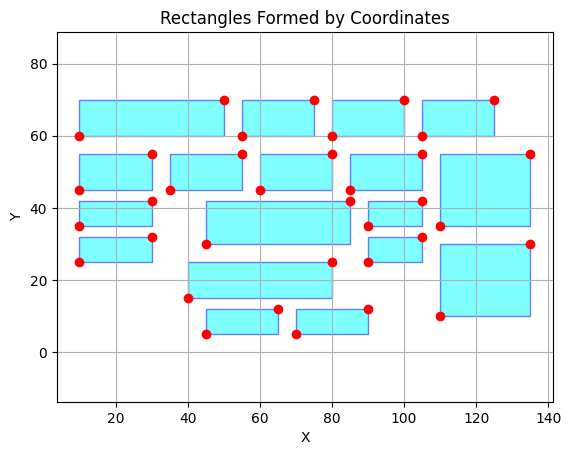

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def check_intersection(rect1, rect2):
    (x1_min, y1_min), (x1_max, y1_max) = rect1
    (x2_min, y2_min), (x2_max, y2_max) = rect2

    if (x1_max <= x2_min or x2_max <= x1_min or
        y1_max <= y2_min or y2_max <= y1_min):
        return False
    return True

def check_intersections(coordinates):
    rectangles = [((min(x1, x2), min(y1, y2)), (max(x1, x2), max(y1, y2))) for ((x1, y1), (x2, y2)) in coordinates]

    for i in range(len(rectangles)):
        for j in range(i + 1, len(rectangles)):
            if check_intersection(rectangles[i], rectangles[j]):
                return True
    return False

def plot_rectangles(coordinates):
    fig, ax = plt.subplots()

    for pair in coordinates:
        (x1, y1), (x2, y2) = pair
        width = abs(x2 - x1)
        height = abs(y2 - y1)
        x_start = min(x1, x2)
        y_start = min(y1, y2)

        rectangle = Rectangle((x_start, y_start), width, height,
                              linewidth=1, edgecolor='blue', facecolor='cyan', alpha=0.5)

        ax.add_patch(rectangle)

        # Mark vertices
        ax.plot([x1, x2], [y1, y2], 'ro')

    # Plot settings
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Rectangles Formed by Coordinates')
    ax.grid(True)
    ax.axis('equal')

    plt.show()

# Example usage
coordinates = [
    # ((x_min, y_min), (x_max, y_max))
    ((10, 60), (50, 70)),    # 1
    ((55, 60), (75, 70)),    # 2
    ((80, 60), (100, 70)),   # 3
    ((105, 60), (125, 70)),  # 4
    ((10, 45), (30, 55)),    # 5
    ((35, 45), (55, 55)),    # 6
    ((60, 45), (80, 55)),    # 7
    ((85, 45), (105, 55)),   # 8
    ((110, 35), (135, 55)),  # 9
    ((10, 35), (30, 42)),    # 10
    ((45, 30), (85, 42)),    # 11
    ((90, 35), (105, 42)),   # 12
    ((10, 25), (30, 32)),    # 13
    ((90, 25), (105, 32)),   # 14
    ((110, 10), (135, 30)),  # 15
    ((40, 15), (80, 25)),    # 16
    ((45, 5), (65, 12)),     # 17
    ((70, 5), (90, 12)),     # 18
]


if check_intersections(coordinates):
    print("There are intersecting rectangles.")
else:
    print("There are no intersections between rectangles.")

plot_rectangles(coordinates)

No intersections detected.


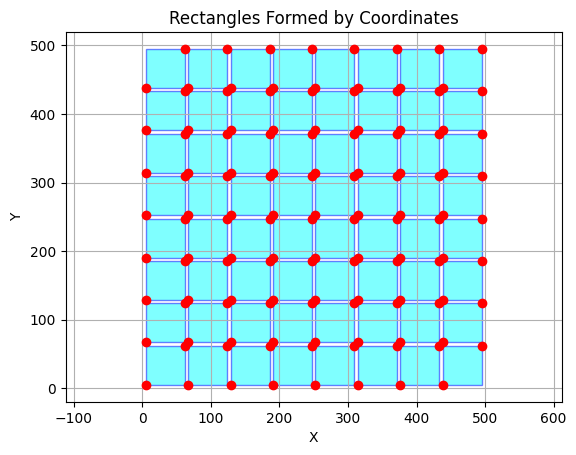

In [3]:
def generate_city_blocks(total_width, total_height, street_width, num_blocks_x, num_blocks_y):
    block_coordinates = []
    
    block_width = (total_width - (num_blocks_x + 1) * street_width) / num_blocks_x
    block_height = (total_height - (num_blocks_y + 1) * street_width) / num_blocks_y
    
    y_start = street_width
    for row in range(num_blocks_y):
        x_start = street_width
        for col in range(num_blocks_x):
            bottom_left = (x_start, y_start)
            top_right = (x_start + block_width, y_start + block_height)
            
            block_coordinates.append((bottom_left, top_right))
            
            x_start += block_width + street_width
        
        y_start += block_height + street_width
        
    return block_coordinates

# Parâmetros
total_width = 500  # largura total da área urbana
total_height = 500  # altura total da área urbana
street_width = 5  # largura das ruas
num_blocks_x = 8  # número de quarteirões horizontais
num_blocks_y = 8  # número de quarteirões verticais

# Gerar coordenadas
blocks = generate_city_blocks(total_width, total_height, street_width, num_blocks_x, num_blocks_y)

# Verificação de interseções (não deve haver interseções)
print("Intersection detected:" if check_intersections(blocks) else "No intersections detected.")

# Plotagem visual dos quarteirões
plot_rectangles(blocks)


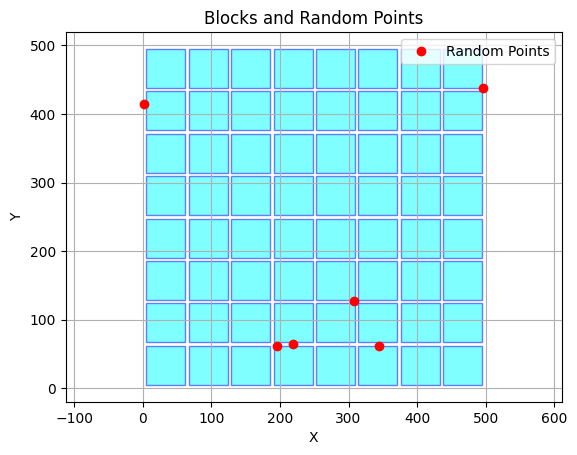

In [4]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def is_point_in_block(point, blocks):
    x, y = point
    for ((x_min, y_min), (x_max, y_max)) in blocks:
        if x_min <= x <= x_max and y_min <= y <= y_max:
            return True
    return False

def generate_random_points(region, blocks, num_points):
    (x_min, y_min), (x_max, y_max) = region
    points = []
    while len(points) < num_points:
        point = (random.uniform(x_min, x_max), random.uniform(y_min, y_max))
        if not is_point_in_block(point, blocks):
            points.append(point)
    return points

def plot_blocks_and_points(blocks, points, region):
    fig, ax = plt.subplots()

    for (bottom_left, top_right) in blocks:
        width = top_right[0] - bottom_left[0]
        height = top_right[1] - bottom_left[1]
        rect = Rectangle(bottom_left, width, height, linewidth=1, edgecolor='blue', facecolor='cyan', alpha=0.5)
        ax.add_patch(rect)

    x, y = zip(*points)
    ax.plot(x, y, 'ro', label='Random Points')

    (x_min, y_min), (x_max, y_max) = region
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Blocks and Random Points')
    ax.grid(True)
    ax.axis('equal')
    ax.legend()

    plt.show()


region = [[0,0],[500,500]]
points = generate_random_points(region, blocks, 6)

plot_blocks_and_points(blocks, points, region)

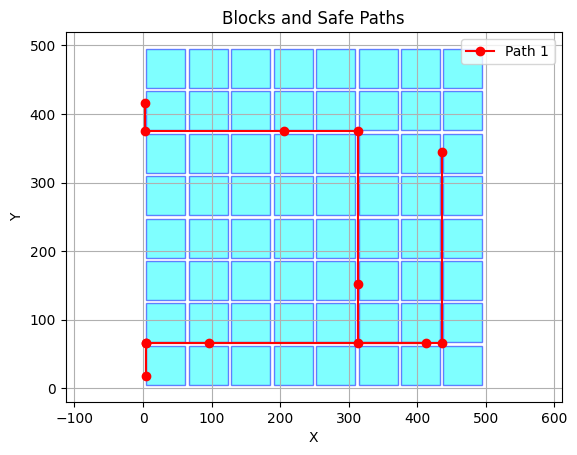

In [24]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def is_point_in_block(point, blocks):
    x, y = point
    for ((x_min, y_min), (x_max, y_max)) in blocks:
        if x_min <= x <= x_max and y_min <= y <= y_max:
            return True
    return False

def intersects_block(p1, p2, block):
    (bx1, by1), (bx2, by2) = block
    rect_edges = [
        ((bx1, by1), (bx2, by1)),
        ((bx2, by1), (bx2, by2)),
        ((bx2, by2), (bx1, by2)),
        ((bx1, by2), (bx1, by1))
    ]
    for edge in rect_edges:
        if segments_intersect(p1, p2, edge[0], edge[1]):
            return True
    return False

def segments_intersect(p1, q1, p2, q2):
    def orientation(p, q, r):
        val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
        if val == 0:
            return 0
        return 1 if val > 0 else 2

    def on_segment(p, q, r):
        return min(p[0], r[0]) <= q[0] <= max(p[0], r[0]) and min(p[1], r[1]) <= q[1] <= max(p[1], r[1])

    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True
    if o1 == 0 and on_segment(p1, p2, q1): return True
    if o2 == 0 and on_segment(p1, q2, q1): return True
    if o3 == 0 and on_segment(p2, p1, q2): return True
    if o4 == 0 and on_segment(p2, q1, q2): return True

    return False

def generate_random_points(region, blocks, num_points):
    (x_min, y_min), (x_max, y_max) = region
    points = []
    while len(points) < num_points:
        point = (random.uniform(x_min, x_max), random.uniform(y_min, y_max))
        if not is_point_in_block(point, blocks):
            points.append(point)
    return points

def connect_with_manhattan(p1, p2, blocks):
    x1, y1 = p1
    x2, y2 = p2
    # Try horizontal then vertical
    mid1 = (x2, y1)
    if not (is_point_in_block(mid1, blocks) or
            any(intersects_block(p1, mid1, b) or intersects_block(mid1, p2, b) for b in blocks)):
        return [mid1, p2]
    # Try vertical then horizontal
    mid2 = (x1, y2)
    if not (is_point_in_block(mid2, blocks) or
            any(intersects_block(p1, mid2, b) or intersects_block(mid2, p2, b) for b in blocks)):
        return [mid2, p2]
    # Try via both middle axes (more complex detour)
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    path = [(mid_x, y1), (mid_x, y2), p2]
    full_path = [p1] + path
    for i in range(len(full_path) - 1):
        if any(intersects_block(full_path[i], full_path[i+1], b) or is_point_in_block(full_path[i+1], blocks) for b in blocks):
            return []
    return path

def generate_paths_with_detours(region, blocks, num_paths, points_per_path):
    paths = []
    for _ in range(num_paths):
        path_points = generate_random_points(region, blocks, points_per_path)
        full_path = [path_points[0]]
        for i in range(1, len(path_points)):
            p1 = full_path[-1]
            p2 = path_points[i]
            segment = connect_with_manhattan(p1, p2, blocks)
            if segment:
                full_path.extend(segment)
        # Fechar ciclo com último para primeiro
        p1 = full_path[-1]
        p2 = full_path[0]
        segment = connect_with_manhattan(p1, p2, blocks)
        if segment:
            full_path.extend(segment)
        paths.append(full_path)
    return paths

def plot_blocks_and_paths(blocks, paths, region):
    fig, ax = plt.subplots()

    for (bottom_left, top_right) in blocks:
        width = top_right[0] - bottom_left[0]
        height = top_right[1] - bottom_left[1]
        rect = Rectangle(bottom_left, width, height, linewidth=1, edgecolor='blue', facecolor='cyan', alpha=0.5)
        ax.add_patch(rect)

    colors = ['red', 'green', 'orange', 'purple', 'brown', 'black']

    for i, path in enumerate(paths):
        if len(path) >= 2:
            x, y = zip(*path)
            ax.plot(x, y, marker='o', linestyle='-', color=colors[i % len(colors)], label=f'Path {i+1}')

    (x_min, y_min), (x_max, y_max) = region
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Blocks and Safe Paths')
    ax.grid(True)
    ax.axis('equal')
    ax.legend()

    plt.show()

    
paths = generate_paths_with_detours(region, blocks, 1, 10)

plot_blocks_and_paths(blocks, paths, region)

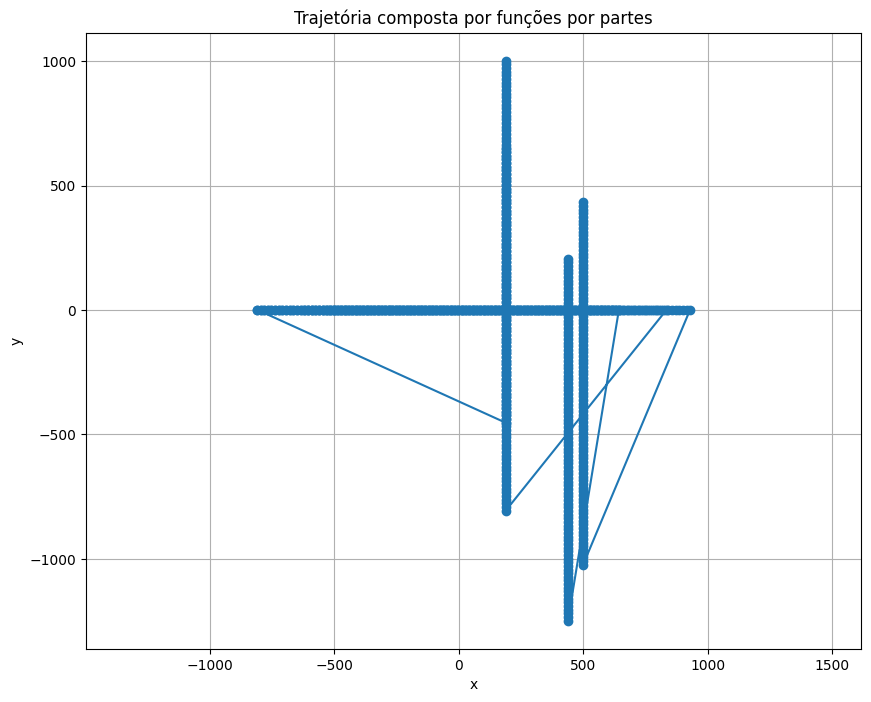

[["499.07286028885125", "431.7897513423985 + -429.83794223540605 * (t - 0.0) / 0.29554338988175904"], ["499.07286028885125 + -344.3691801095755 * (t - 0.29554338988175904) / 0.2367776895894571", "1.951809106992497"], ["154.70368017927578 + 33.45251418246991 * (t - 0.5323210794712161) / 0.02300092306914177", "1.951809106992497"], ["188.1561943617457", "1.951809106992497 + 95.84150448310736 * (t - 0.5553220025403579) / 0.06589767990000436"], ["188.1561943617457", "97.79331359009986 + -96.39910411412096 * (t - 0.6212196824403623) / 0.06628106830980725"], ["188.1561943617457 + 172.6236481695219 * (t - 0.6875007507501696) / 0.11869072769252208", "1.3942094759789025"], ["360.7798425312676 + 77.09510413890729 * (t - 0.8061914784426917) / 0.05300822980401631", "1.3942094759789025"], ["437.8749466701749", "1.3942094759789025 + 204.7797709080662 * (t - 0.859199708246708) / 0.14080029175329214"]]


In [22]:
def path_to_piecewise_functions(path):
    functions = []
    total_len = sum(((x2 - x1)**2 + (y2 - y1)**2)**0.5 for (x1, y1), (x2, y2) in zip(path, path[1:]))
    current_t = 0.0
    for (x1, y1), (x2, y2) in zip(path, path[1:]):
        dx = x2 - x1
        dy = y2 - y1
        segment_len = (dx**2 + dy**2)**0.5
        dt = segment_len / total_len
        x_eq = f"{x1} + {dx} * (t - {current_t}) / {dt}" if dx != 0 else f"{x1}"
        y_eq = f"{y1} + {dy} * (t - {current_t}) / {dt}" if dy != 0 else f"{y1}"
        functions.append((x_eq, y_eq))
        current_t += dt
    return functions

import numpy as np
import matplotlib.pyplot as plt

def evaluate_function(expression: str, t_values: np.ndarray) -> np.ndarray:
    return np.array([eval(expression, {"t": t, "np": np}) for t in t_values])

def evaluate_segment(x_expr, y_expr, num_points=100):
    t_vals = np.linspace(0, 1, num=num_points)
    x_vals = evaluate_function(x_expr, t_vals)
    y_vals = evaluate_function(y_expr, t_vals)
    return x_vals, y_vals

def plot_this(raw_data):
    path_data = json.loads(raw_data)
    all_x, all_y = [], []
    for x_expr, y_expr in path_data:
        x_seg, y_seg = evaluate_segment(x_expr, y_expr)
        all_x.extend(x_seg)
        all_y.extend(y_seg)

    plt.figure(figsize=(10, 8))
    plt.plot(all_x, all_y, marker='o')
    plt.title("Trajetória composta por funções por partes")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.axis("equal")
    plt.show()

import json
for path in paths:
    path_str = path_to_piecewise_functions(path)
    path_json = json.dumps(path_str)
    plot_this(path_json)
    print(path_json)